
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">


##  **Projeto de Data Science - Módulo 1 - "Data Science na Prática"**

## Análise dos dados do Airbnb da cidade de **Chicago**


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, mesmo não possuindo nenhum hotel. A empresa inaugurou, por assim dizer, um sistema descentralizado de hospedagem. 


Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece soluções mais simples e economômicas para ambas as partes.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Chicago e ver quais insights podem ser extraídos a partir de dados brutos.**



## **Obtenção de Dados:**

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Chicago (good for visualisations).*


In [ ]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
# com este comando, a variavel df adquiri todo o dataset listings.csv referente aos dados de Chicago

df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2020-05-23/visualisations/listings.csv")



## Análise dos Dados

A análise, neste ponto, consiste em estudar o dataset escolhido e começar a compreender como os seus dados estão organizados.



**Variáveis do dataset e seus significados**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias




In [ ]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,117,2,394,2020-02-16,2.88,1,220
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,80,2,384,2020-03-08,2.90,1,264
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,49,2019-10-23,0.66,10,315
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,35,2,44,2020-02-14,0.65,5,269


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).


In [ ]:
#identificar o volume de dados do DataFrame:
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {} \n".format(df.shape[1]))


#verificar as entradas do dataset e seus tipos de dados"
display(df.dtypes)


Entradas: 	 7889
Variáveis: 	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.00000
reviews_per_month                 0.15642
last_review                       0.15642
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
price                             0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_name                         0.00000
host_id                           0.00000
name                              0.00000
id                                0.00000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

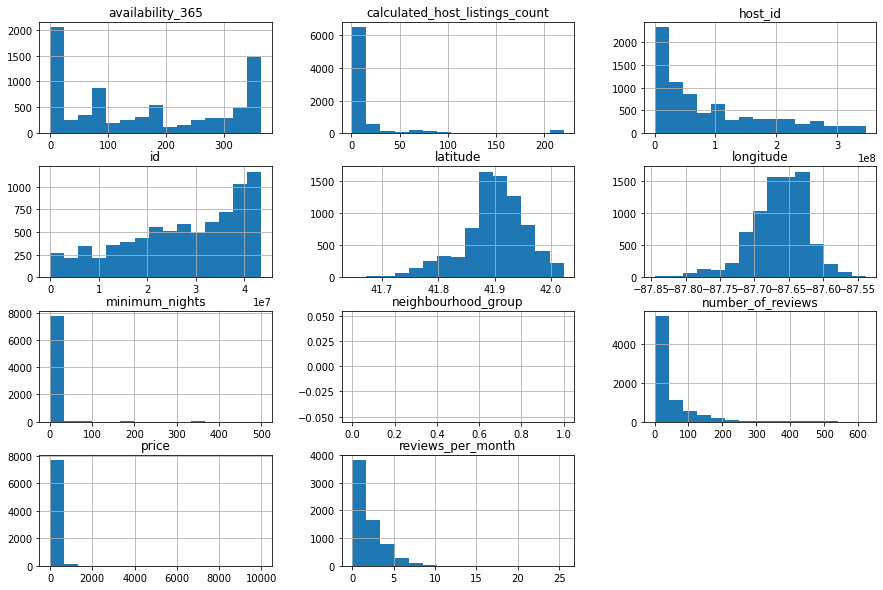

In [ ]:
# histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));


### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7889.000000,7889.000000,7889.000000,6655.000000,7889.000000,7889.000000
mean,168.485233,6.453923,41.879959,1.909181,15.401065,164.379643
std,420.613026,19.214980,64.227110,1.831963,39.183371,137.480203
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,61.000000,1.000000,2.000000,0.510000,1.000000,20.000000
50%,100.000000,2.000000,16.000000,1.350000,2.000000,146.000000
75%,160.000000,3.000000,55.000000,2.840000,9.000000,315.000000
max,10000.000000,500.000000,623.000000,25.530000,220.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 160, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) equivale a 500, mais do que todos os dias em um ano.

#### Boxplot para minimum_nights


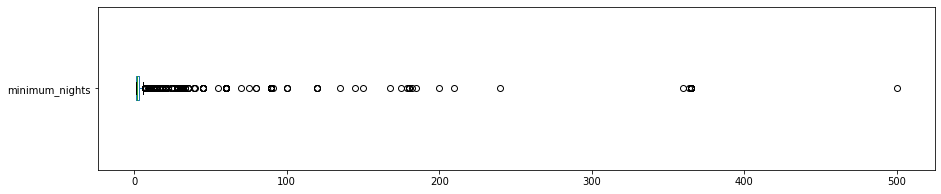

minimum_nights: valores acima de 30:
390 entradas
4.9436%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para price

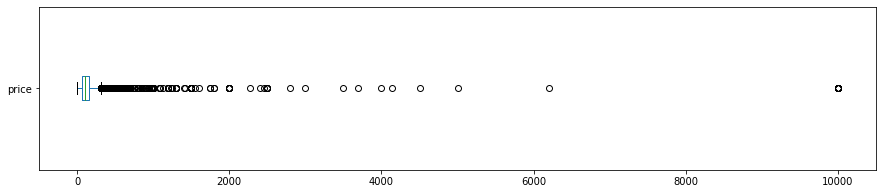


price: valores acima de 1000
73 entradas
0.9253%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));



Baseado na última célula podemos ver que há apenas 73 entradas no dataset cujo valor esta acima de 1000, o que equivale a 0.9253% dos dados analisados.
Isto é, há apenas 73 locais cujo aluguel custa mais de 1000 dólares por noite no Airbnb em Chicago, e mais de 99% dos quartos está abaixo desse valor.





### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

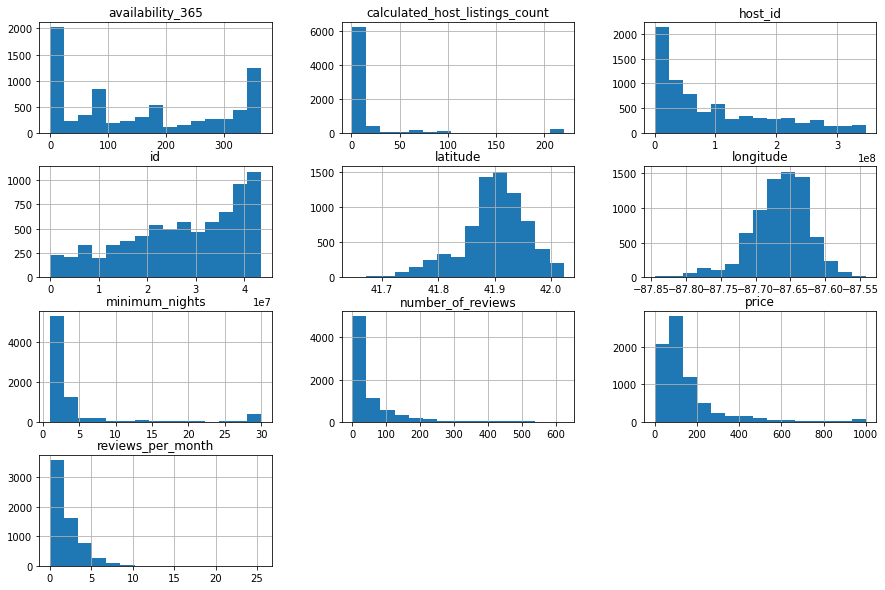

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));



### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.027233,-0.124899,-0.121470,-0.028528,0.105656
minimum_nights,-0.027233,1.000000,-0.156293,-0.172264,0.605008,0.110977
number_of_reviews,-0.124899,-0.156293,1.000000,0.699007,-0.134611,0.078828
reviews_per_month,-0.121470,-0.172264,0.699007,1.000000,0.040895,0.044137
calculated_host_listings_count,-0.028528,0.605008,-0.134611,0.040895,1.000000,0.153277
availability_365,0.105656,0.110977,0.078828,0.044137,0.153277,1.000000


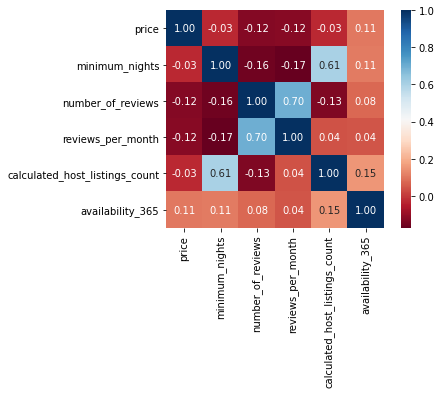

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4972
Private room       2271
Shared room         111
Hotel room           75
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.669269
Private room       0.305694
Shared room        0.014941
Hotel room         0.010096
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Chicago?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Near South Side    236.614907
Near North Side    230.432320
Loop               194.052632
Lincoln Park       192.680791
Lake View          186.158400
North Center       183.584906
West Englewood     170.000000
Oakland            163.166667
Archer Heights     158.285714
West Town          150.656036
Name: price, dtype: float64

Acima, vemos que bairros próximos a zonas sul e norte de Chicago, Near South Side e Near North Side, e o Loop estão com média de preço superior a de lugares como Lake View, Lyncoln Park e Gold Coast, os quais podem ser considerados os bairros cujo custo de vida é maior. 


Isto posto, é possível que alguém sem conhecimento prévio da cidade aceitasse o resultado sem levantar qualquer questionamento, quando na verdade essa pessoa pode estar se equivocando. A região do Loop de Chicago de fato tem alto custo, mas ainda assim é mais razoável esperar um resultado diferente do que foi mostrado. 



In [45]:
# ver quantidade de imóveis no Near South Side
print(df_clean[df_clean.neighbourhood == "Near South Side"].shape)

df_clean[df_clean.neighbourhood == "Near South Side"] 

(161, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
56,450648,Luxury Space - Come & Relax,2204693,Dl,Near South Side,41.86614,-87.62275,Private room,119,3,38,2018-06-21,0.39,1,142
121,1083987,MODERN LOFT Downtown by McCormick w/KING BED WiFi,3965428,Rob,Near South Side,41.85278,-87.62453,Entire home/apt,85,30,21,2020-01-06,0.25,76,282
272,3061036,Private Room-sunny retro loft Cleaning supplies,1876022,Leslie,Near South Side,41.85298,-87.62761,Private room,85,2,488,2020-05-15,6.66,1,211
901,9632414,The Cunningham,49816545,Suzanne,Near South Side,41.85100,-87.62411,Entire home/apt,500,1,55,2020-03-15,1.11,4,0
1134,12382366,Charming Museum Park Town House,66219209,Bindi,Near South Side,41.86442,-87.62143,Entire home/apt,166,3,22,2018-07-28,0.45,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,43329620,★ 40% Off! CDC Clean! The Picasso ❤️ McCormick...,59802916,True North,Near South Side,41.85469,-87.62587,Entire home/apt,97,1,0,NaN,NaN,12,69
7821,43329621,★ 40% Off! CDC Clean! The Picasso ❤️ McCormick...,59802916,True North,Near South Side,41.85333,-87.62529,Entire home/apt,97,1,0,NaN,NaN,12,69
7839,43375448,Amazing 2/2 on MICHIGAN AVE with optional Parking,31424769,Max,Near South Side,41.85563,-87.62471,Entire home/apt,550,2,2,2020-05-21,2.00,21,178
7841,43383992,Michigan avenue Unique 2Br/2Ba w Optional Parking,31424769,Max,Near South Side,41.85421,-87.62535,Entire home/apt,545,2,1,2020-05-10,1.00,21,179


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.


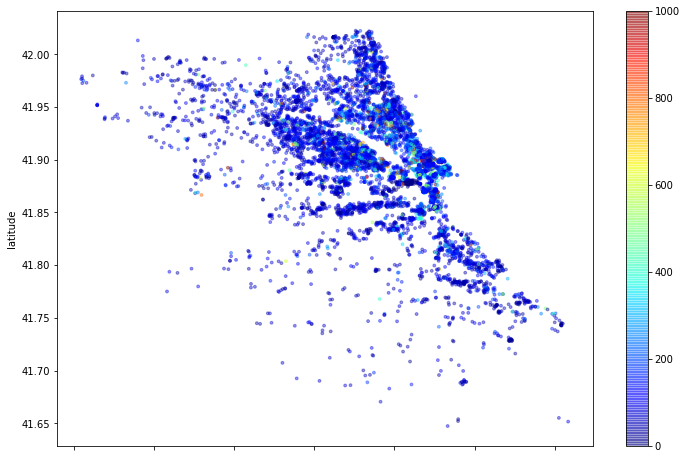

In [46]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**

Chegamos ao fim desse pequeno projeto. Este trabalho refere-se ao primeiro projeto realizado no curso 'Data Science na Pratica', e tem como um dos objetivos fornecer um primeiro contato com a análise de dados a partir de um dataset real.

Mesmo com essa análise superficial, utilizando um dataset pequeno(o site Airbnb disponibiliza outros mais complexos e com muito mais dados, mas não eram adequados para este momento inicial), podemos perceber a exitência de **outliers** em algumas variáveis e como eles podem influenciar nos resultados. Vimos também que a análise não pode consistir somente da utilização dos métodos da linguagem Python, pois também é necessário interpretar os resultados a fim de extrair informações cada vez mais úteis e verossímeis. 
